In [54]:
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [13]:
def vectorTrain(path):

    dict_images = {}
    for idx in range(10):

        arq_names = os.listdir(f"{path}/{idx}/")
        list_arqs = list()
        for arq in arq_names:
            path_arq = path + str(idx) + "/" + arq
            img = Image.open(path_arq)
            array = np.asarray(Image.fromarray(np.asarray(img)).resize((10,20)))
            list_arqs.append(array)
        dict_images[f"{idx}"] = list_arqs

    return dict_images

In [28]:
images_dict = vectorTrain("/UTFPR/InteligenciaComputacional/InteligenciaComputacional/treino/teste/")


In [42]:
# print(images_dict["5"][1][12:17,0:5])
print(images_dict["0"][1])

print()
print(np.count_nonzero(images_dict["5"][1][12:17,0:5]))

[[255 255 208 113   0   0   0  29 198 238]
 [255 189  13   0   0   0   0   0   0 187]
 [255 102   0   0   0   0   0   0   0  53]
 [187   9   0   0   0  37   9   0   0   0]
 [180   0   0   0  72 255 168  14   0   0]
 [181   0   0  68 238 255 255  39   0   0]
 [188   0   0 114 255 255 255  37   0   0]
 [128   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  37   0   0]
 [  0   0   0 109 255 255 255  39   0   0]
 [  0   0   0 112 255 255 167  14   0   0]
 [155   0   0  16 186 186   9   0   0   0]
 [180   0   0   0   0   0   0   0   0  53]
 [221  55   0   0   0   0   0   0   0 187]
 [255 229  29   0   0   0   0   0  85 238]]

17


In [57]:
df = pd.DataFrame(columns=['atributo_1', 'atributo_2', 'atributo_3', 'atributo_4',
                            'atributo_5', 'atributo_6', 'atributo_7', 'atributo_8', 'numero'])

# new_data = {'atributo_1': 2, 'atributo_2': 2, 'atributo_3': 2, 'atributo_4': 4}
# df.loc[1] = new_data

df

,atributo_1,atributo_2,atributo_3,atributo_4,atributo_5,atributo_6,atributo_7,atributo_8,numero


In [64]:
data_idx = 1

for idx in range(10):
    
    number_list = images_dict[f"{idx}"]
    new_data = {}
    row_count = 0
    col_count = 0
    contador = 1
    for data in number_list:
        row_count = 0

        for row in range(4):
            col_count = 0
            for col in range(2):    
                contagem = np.count_nonzero(data[row_count : (row_count+5)-1, col_count : (col_count+5)-1])
                new_data[f"atributo_{contador}"] = contagem
                
                contador +=1
                col_count +=5

            row_count += 5

        new_data["numero"] = idx
        df.loc[data_idx] = new_data
        data_idx += 1
        contador = 1

df.head(100)

,atributo_1,atributo_2,atributo_3,atributo_4,atributo_5,atributo_6,atributo_7,atributo_8,numero
1,10,4,4,8,4,8,4,4,0
2,11,4,7,12,4,12,6,5,0
3,9,3,4,12,4,8,6,4,0
4,7,5,4,10,4,8,4,3,0
5,13,2,6,12,6,11,6,5,0
...,...,...,...,...,...,...,...,...,...
96,13,9,11,12,12,12,10,9,0
97,13,7,11,13,8,14,6,7,0
98,12,6,8,8,7,8,9,6,0
99,7,6,6,8,4,8,9,6,0


In [65]:
from sklearn.decomposition import PCA

X = df.drop('numero', axis=1)
y = df.get('numero')


e:\UTFPR\AprendizagemDeMaquina\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\UTFPR\AprendizagemDeMaquina\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\UTFPR\AprendizagemDeMaquina\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\UTFPR\AprendizagemDeMaquina\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='PC 0', ylabel='PC 1'>

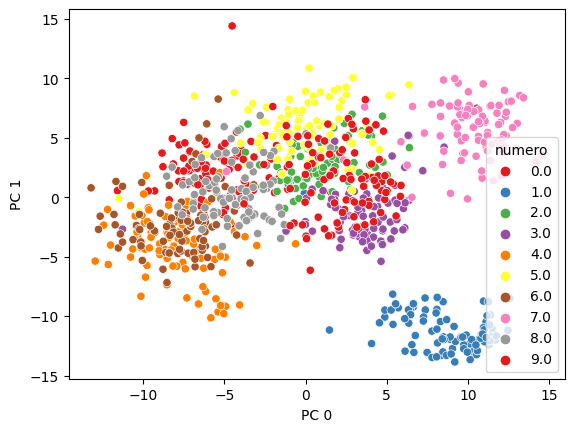

In [66]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1'])

sns.set_palette('seismic')
sns.scatterplot(data=X_pca_df, x='PC 0', y='PC 1', hue=y, palette='Set1')

In [68]:
from sklearn.metrics import pairwise_distances

class KNN(object):
    def __init__(self, k):
        self.k = k
        self.pontos = None
        self.rotulos = None
        
    def fit(self, X, y):
        self.pontos = X
        self.rotulos = y
        
    @staticmethod
    def dist(p,q):
        return np.sqrt(np.sum((p-q)**2))    
    
    def predict(self, X):
        predicoes = []

        for p in X:
            d = pairwise_distances(self.pontos, p.reshape((1,-1))).flatten()
            ds = np.argsort(d)
            knn = ds[:self.k]
            rotulos = self.rotulos[knn]
            rotulos, cont = np.unique(rotulos, return_counts=True)
            pred = rotulos[np.argmax(cont)]
            predicoes.append(pred)
        return np.array(predicoes)


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
atributos = ['atributo_1', 'atributo_2', 'atributo_3', 'atributo_4',
                'atributo_5', 'atributo_6', 'atributo_7', 'atributo_8']


X_treino, X_teste, y_treino, y_teste = train_test_split(
        X.values, y.values, test_size=0.2, random_state=1,
        stratify=y.values)

knn = KNN(k=3)
knn.fit(X_treino, y_treino)   
pred = knn.predict(X_teste)   

print("Acurácia no teste: %.2f" % accuracy_score(y_teste, pred))

Acurácia no teste: 0.95
